In [13]:
import numpy as np
import numba as nb


@nb.njit()
def ascii_conversion(plaintext: str) -> np.ndarray:
    str_characters = list(plaintext)
    str_characters = [ord(s) for s in str_characters]
    str_array = np.array(str_characters)

    return str_array

In [19]:
plaintext = "Hello World."

ascii_table = ascii_conversion(plaintext)

In [17]:
test_array = np.array([[1, 2, 3], [4, 5, 6]])
test_array[0, 2]

3

In [23]:
@nb.njit()
def cantor_inverse(ascii_table: np.ndarray) -> np.ndarray:
    cantor_points = np.zeros(shape=(ascii_table.shape[0], 2), dtype=np.int64)

    for i in nb.prange(cantor_points.shape[0]):
        n = np.floor((-1 + np.sqrt(1 + 8*ascii_table[i])) / 2)
        cantor_points[i][0] = ascii_table[i] - (0.5)*n*(n+1)
        cantor_points[i][1] = n - cantor_points[i][0]
    
    return cantor_points

In [24]:
cantor_inverse(ascii_table)

array([[ 6,  5],
       [10,  3],
       [ 3, 11],
       [ 3, 11],
       [ 6,  8],
       [ 4,  3],
       [ 9,  3],
       [ 6,  8],
       [ 9,  5],
       [ 3, 11],
       [ 9,  4],
       [ 1,  8]], dtype=int64)

In [1]:
from Encryption import Encrypt

plaintext = "Hello World."

encryptor = Encrypt(plaintext, 4, -1, -4, 2, 1, 2)

cantor_points = encryptor.get_cantor_points()
encrypted_points = encryptor.get_encrypted_points()

print(cantor_points)
print(len(cantor_points))
print(encrypted_points)
print(len(encrypted_points))

[[ 6  5]
 [10  3]
 [ 3 11]
 [ 3 11]
 [ 6  8]
 [ 4  3]
 [ 9  3]
 [ 6  8]
 [ 9  5]
 [ 3 11]
 [ 9  4]
 [ 1  8]]
12
[[  4 -10]
 [ -6  -5]
 [ 10  -7]
 [  1 -13]
 [  7 -10]
 [  0  -5]
 [  2 -13]
 [ -2 -10]
 [  4 -13]
 [  1 -13]
 [  3 -13]
 [  3 -10]]
12


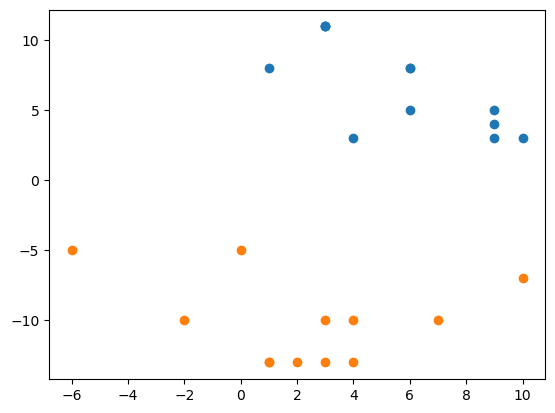

In [10]:
import matplotlib.pyplot as plt

plt.scatter(cantor_points[:, 0], cantor_points[:, 1])
plt.scatter(encrypted_points[:, 0], encrypted_points[:, 1])
plt.show()

In [2]:
encryptor.get_shared_key()

'114211214112111112'

-> We want a shared key that can be exchanged through an asymmetric system

In [47]:
#             h1 k1 h2  k2 n1 n2 
# parameters = [4, -1, -4, 2, 1, 2]
import random

parameters = []

for _ in range(6):
    temp = random.randint(-1000, 1000)
    print(temp)
    parameters.append(temp)

parity_bits = []

for index, param in enumerate(parameters):
    if param >= 0:
        parameters[index] = str(param)
        parity_bits.append(str(1))
    else:
        param = param * (-1)
        parameters[index] = str(param)
        parity_bits.append(str(2))

shared_key = []

for parity, parameter in zip(parity_bits, parameters):
    shared_key.append(parity)
    shared_key.append(str(len(parameter)))
    shared_key.append(parameter)

key = "".join(shared_key)

print(key)

[20, 15, 36, -50, -95, -4]

[348, -795, 978, -667, 990, -609]

348
-795
978
-667
990
-609
133482379513978236671399023609


[20, 15, 36, -50, -95, -4]

Parity Bit  Digit Bit  Actual Parameter
     1          3            443                211214112111112

Parity Bit  Digit Bit  Actual Parameter
     1          2            23             12451214 223022771223

Parity Bit  Digit Bit  Actual Parameter
    2           2            30

In [49]:
key = '133482379513978236671399023609'

key_list = list(key)

print(key_list)
print(len(key_list))
# We know the first digit bit is at index 1

digit_bit_indices = []

current_digit_bit_index = 1

digit_bit_indices.append(current_digit_bit_index)

current_digit_bit_value = int(key_list[current_digit_bit_index])

while True:

    print(digit_bit_indices)
    
    try:
        current_digit_bit_index = current_digit_bit_index + current_digit_bit_value + 2

        current_digit_bit_value = int(key_list[current_digit_bit_index])

        digit_bit_indices.append(current_digit_bit_index)
    except:
        break

['1', '3', '3', '4', '8', '2', '3', '7', '9', '5', '1', '3', '9', '7', '8', '2', '3', '6', '6', '7', '1', '3', '9', '9', '0', '2', '3', '6', '0', '9']
30
[1]
[1, 6]
[1, 6, 11]
[1, 6, 11, 16]
[1, 6, 11, 16, 21]
[1, 6, 11, 16, 21, 26]


In [50]:
parity_bit_indices = [x-1 for x in digit_bit_indices]

parity_bit_values = [int(key_list[x]) for x in parity_bit_indices]

digit_bit_values = [int(key_list[x]) for x in digit_bit_indices]

print(parity_bit_values)
print(digit_bit_values)

[1, 2, 1, 2, 1, 2]
[3, 3, 3, 3, 3, 3]


In [51]:
parameter = []

parity = 0

for index, skip in zip(digit_bit_indices, digit_bit_values):
    param_start = index + 1
    param_end = index + skip + 1

    param = key_list[param_start:param_end]
    print(param)
    param = "".join(param)
    param = int(param)
    
    if parity_bit_values[parity] == 1:
        parameter.append(param)
    else:
        param = param * (-1)
        parameter.append(param)

    parity = parity + 1

print(parameter)

['3', '4', '8']
['7', '9', '5']
['9', '7', '8']
['6', '6', '7']
['9', '9', '0']
['6', '0', '9']
[348, -795, 978, -667, 990, -609]
